In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df=pd.read_csv("Deep-Into-CNN-master\Datasets\diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.shape

(768, 9)

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<ipython-input-72-79d59cfc256a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

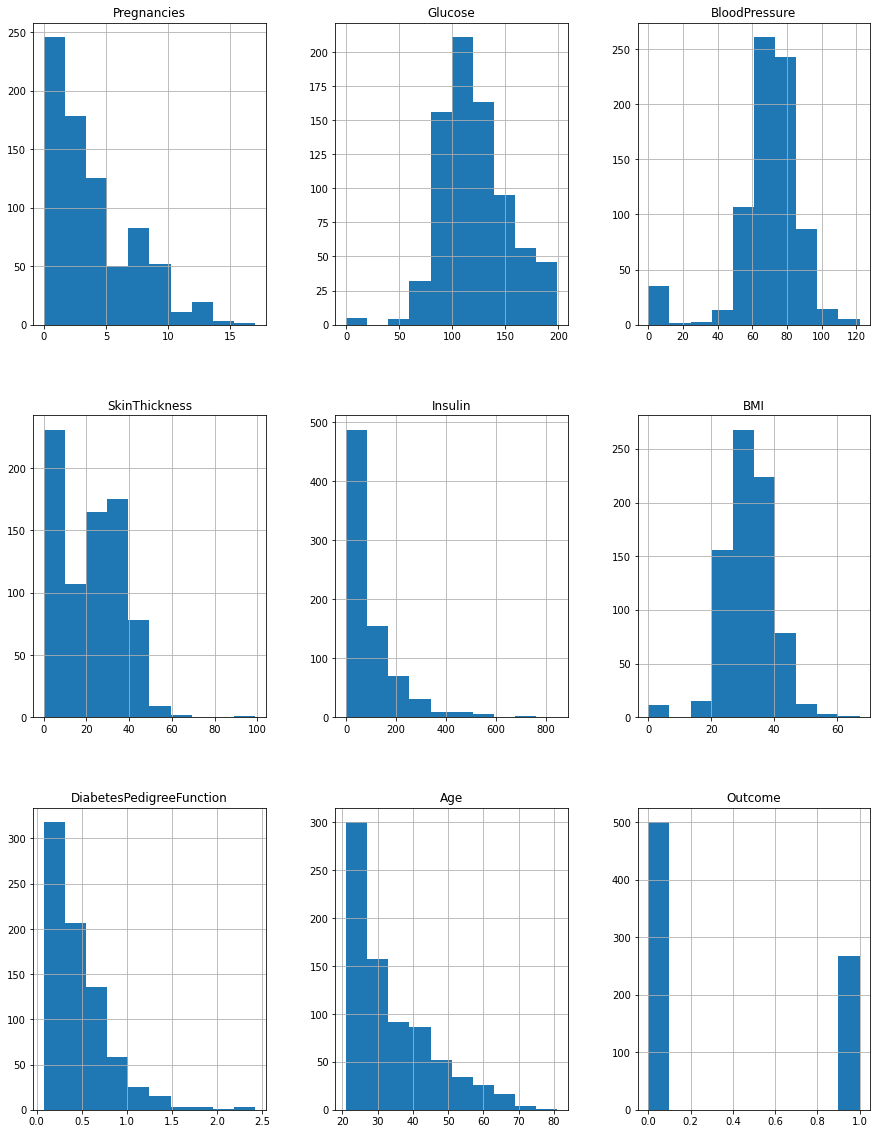

In [72]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [44]:
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X[0:5]



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [45]:
y=df['Outcome']
y[0:5]


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [46]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print("Train set:",X_train.shape ,y_train.shape)
print("Test_set:",X_test.shape,y_test.shape)

Train set: (614, 8) (614,)
Test_set: (154, 8) (154,)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression().fit(X_train,y_train)

In [59]:
yhat=lr.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [55]:
yhat_prob=lr.predict_proba(X_test)
yhat_prob

array([[0.84618903, 0.15381097],
       [0.91934837, 0.08065163],
       [0.89949266, 0.10050734],
       [0.61886775, 0.38113225],
       [0.78766887, 0.21233113],
       [0.17030821, 0.82969179],
       [0.4643137 , 0.5356863 ],
       [0.55695186, 0.44304814],
       [0.08237672, 0.91762328],
       [0.79590502, 0.20409498],
       [0.49308011, 0.50691989],
       [0.94653759, 0.05346241],
       [0.79926146, 0.20073854],
       [0.94594828, 0.05405172],
       [0.88065595, 0.11934405],
       [0.33194138, 0.66805862],
       [0.11963259, 0.88036741],
       [0.049985  , 0.950015  ],
       [0.9637167 , 0.0362833 ],
       [0.95418596, 0.04581404],
       [0.88428809, 0.11571191],
       [0.27955451, 0.72044549],
       [0.73366583, 0.26633417],
       [0.14048496, 0.85951504],
       [0.8144721 , 0.1855279 ],
       [0.70980375, 0.29019625],
       [0.89452481, 0.10547519],
       [0.31812596, 0.68187404],
       [0.74223918, 0.25776082],
       [0.8032012 , 0.1967988 ],
       [0.

In [60]:
print ('\n sklearn bias(intercept) term :', lr.intercept_)
print ('\n sklearn estimated coefficients :', lr.coef_)


 sklearn bias(intercept) term : [-0.834576]

 sklearn estimated coefficients : [[ 0.45473393  0.97558381 -0.29235286  0.00963133 -0.03917234  0.70819416
   0.38836837  0.22975039]]


In [63]:
conf_m=confusion_matrix(y_test,yhat)
conf_m

array([[90, 12],
       [17, 35]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score
score=accuracy_score(yhat,y_test)
score

0.8116883116883117